<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


*   Identify duplicate values in the dataset.

*   Remove duplicate values from the dataset.

*   Identify missing values in the dataset.

*   Impute the missing values in the dataset.

*   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',85)
pd.set_option('display.width', 1000)

Load the dataset into a dataframe.


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

In [54]:
df = pd.read_csv('m1_survey_data.csv')
df.shape

(11552, 85)

In [55]:
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irrespon

In [56]:
a = df["Respondent"].count()
b = df["Respondent"].nunique()
print(a, b, a - b)

11552 11398 154


## Finding duplicates


In this section you will identify duplicate values in the dataset.


Find how many duplicate rows exist in the dataframe.


In [57]:
# your code goes here
df.duplicated(keep='first').sum()

154

In [58]:
df_duplicate = df[df.duplicated()]
df_duplicate.shape

(154, 85)

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [59]:
# your code goes here
df.drop_duplicates(ignore_index=True, inplace=True)

Verify if duplicates were actually dropped.


In [60]:
# your code goes here
df.duplicated(keep = 'first').sum()

0

In [61]:
df.shape

(11398, 85)

## Finding Missing values


Find the missing values for all columns.


In [62]:
# your code goes here
df.isnull().sum()

Respondent                   0
MainBranch                   0
Hobbyist                     0
OpenSourcer                  0
OpenSource                  81
Employment                   0
Country                      0
Student                     51
EdLevel                    112
UndergradMajor             737
EduOther                   164
OrgSize                     96
DevType                     65
YearsCode                    9
Age1stCode                  13
YearsCodePro                16
CareerSat                    0
JobSat                       1
MgrIdiot                   493
MgrMoney                   497
MgrWant                    493
JobSeek                      0
LastHireDate                 0
LastInt                    413
FizzBuzz                    37
JobFactors                   3
ResumeUpdate                39
CurrencySymbol               0
CurrencyDesc                 0
CompTotal                  809
CompFreq                   206
ConvertedComp              816
WorkWeek

Find out how many rows are missing in the column 'WorkLoc'


In [63]:
# your code goes here
df.WorkLoc.isnull().sum()

32

In [64]:
df.EdLevel.isnull().sum()

112

## Imputing missing values


Find the  value counts for the column WorkLoc.


In [65]:
# your code goes here
df.WorkLoc.value_counts(ascending=True)

Other place, such as a coworking space or cafe     971
Home                                              3589
Office                                            6806
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [66]:
#make a note of the majority value here, for future reference
# Office

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [67]:
# your code goes here
df["WorkLoc"].fillna(value="Office",inplace=True)

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [68]:
# your code goes here
df.WorkLoc.value_counts(ascending=True)

Other place, such as a coworking space or cafe     971
Home                                              3589
Office                                            6838
Name: WorkLoc, dtype: int64

In [69]:
df.Employment.value_counts(ascending=True)

Employed part-time      430
Employed full-time    10968
Name: Employment, dtype: int64

In [70]:
df.UndergradMajor.value_counts(ascending=True)

A health science (ex. nursing, pharmacy, radiology)                        24
I never declared a major                                                  124
Fine arts or performing arts (ex. graphic design, music, studio art)      161
A humanities discipline (ex. literature, history, philosophy)             207
A social science (ex. anthropology, psychology, political science)        210
A business discipline (ex. accounting, finance, marketing)                244
Mathematics or statistics                                                 372
A natural science (ex. biology, chemistry, physics)                       403
Web development or web design                                             410
Another engineering discipline (ex. civil, electrical, mechanical)        759
Information systems, information technology, or system administration     794
Computer science, computer engineering, or software engineering          6953
Name: UndergradMajor, dtype: int64

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [71]:
# your code goes here
df["CompFreq"].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

In [72]:
df["Respondent"].nunique()

11398

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [73]:
# your code goes here
df.CompFreq.replace(to_replace="Yearly",value=1,inplace=True)
df.CompFreq.replace(to_replace="Monthly",value=12,inplace=True)
df.CompFreq.replace(to_replace="Weekly",value=52,inplace=True)

df.CompFreq.unique()

array([ 1., 12., 52., nan])

In [74]:
df.CompFreq.value_counts()

1.0     6073
12.0    4788
52.0     331
Name: CompFreq, dtype: int64

In [75]:
df['NormalizedAnnualCompensation'] = df['CompTotal'] * df['CompFreq']
df.shape

(11398, 86)

In [76]:
df['NormalizedAnnualCompensation'].median()

100000.0

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

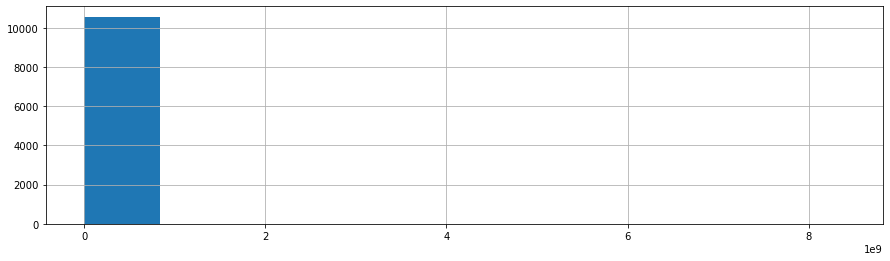

In [27]:
df['NormalizedAnnualCompensation'].hist(figsize=(15,4))

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
